<h1>Artificial Neural Network with human activity recognition</h1>

<b>Introduction : </b>

Human Activity Recognition (HAR) involves classifying physical activities based on data collected from sensors, such as accelerometers and gyroscopes. The HAR dataset, which includes comprehensive sensor readings, serves as a critical resource for developing models that can accurately identify a variety of human movements. In this notebook, we leverage Artificial Neural Networks (ANN) to analyze the HAR dataset. ANN's capability to learn complex patterns and relationships within the data makes it an ideal choice for this task. Our goal is to harness the power of ANN to achieve high accuracy in classifying different activities, contributing to advancements in applications like healthcare monitoring, fitness tracking, and smart environments.

<b>Notebook content: </b>
- Data preprocessing
- Prepare the dataset for ANN
- ANN models on full data
- Under sampling
- Using Timestamp in ANN
- Discussion and Evaluation
- Hyper parameter tuning
- Conclusion

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Input,LeakyReLU
import keras
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
# import tensorflow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-25 10:05:59.262130: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 10:06:06.076751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<h2>Data preprocessing </h2>

In [2]:
all_dataframes = [pd.read_csv(f) for f in ['data/harth/S006.csv', 'data/harth/S008.csv','data/harth/S009.csv','data/harth/S010.csv','data/harth/S012.csv','data/harth/S013.csv','data/harth/S014.csv','data/harth/S015.csv','data/harth/S016.csv','data/harth/S017.csv','data/harth/S018.csv','data/harth/S019.csv','data/harth/S020.csv','data/harth/S021.csv','data/harth/S022.csv','data/harth/S023.csv','data/harth/S024.csv','data/harth/S025.csv','data/harth/S026.csv','data/harth/S027.csv','data/harth/S028.csv','data/harth/S029.csv']]
final_df = pd.concat(all_dataframes, ignore_index=True)

All the 22 csv are merged into one dataframe

In [3]:
final_df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,NaN,NaN
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,NaN,NaN
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,NaN,NaN
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,NaN,NaN
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6461323,2019-01-12 00:59:56.940,-1.012939,-0.110840,-0.218994,-0.970215,-0.313232,0.124268,3,NaN,NaN
6461324,2019-01-12 00:59:56.960,-0.979492,-0.089355,-0.216553,-0.966553,-0.234619,0.113770,3,NaN,NaN
6461325,2019-01-12 00:59:56.980,-0.969971,-0.057861,-0.204590,-0.997803,-0.097656,0.065186,3,NaN,NaN
6461326,2019-01-12 00:59:57.000,-1.001953,-0.029785,-0.234863,-1.000000,-0.145996,0.061523,3,NaN,NaN


7 out of 10 columns are considered during this study 

In [4]:
features = final_df[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"]]
label = final_df["label"]

X_train, X_temp, y_train, y_temp = train_test_split(features, label, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train.shape, " --- y_train = ", y_train.shape )
print ("X_val =",X_val.shape, " --- y_val = ", y_val.shape )
print ("X_test =",X_test.shape, " --- y_test = ", y_test.shape )

X_train = (4522929, 6)  --- y_train =  (4522929,)
X_val = (969199, 6)  --- y_val =  (969199,)
X_test = (969200, 6)  --- y_test =  (969200,)


<h3>Prepare the dataset for ANN </h3>

Check keras and tensorflow versions

In [5]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

Keras version: 3.3.2
TensorFlow version: 2.16.1


In [6]:
print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)

X_train shape: (4522929, 6)
X_test shape: (969200, 6)


In [7]:
classes = np.unique(y_train)
classes 

array([  1,   2,   3,   4,   5,   6,   7,   8,  13,  14, 130, 140])

We see 12 levels target

The need to encode the target to be used in ANN 

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train) 
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test) 
y_val_encoded=encoder.transform(y_val) 

In [9]:
y_train

1617878    7
1833228    3
2750872    7
2828907    6
4374775    7
          ..
4926484    6
4304572    1
1692743    6
6423388    1
6413414    1
Name: label, Length: 4522929, dtype: int64

In [10]:
y_train_encoded

array([6, 2, 6, ..., 5, 0, 0])

In [16]:
np.unique(y_train_encoded)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

<h2>ANN models on  full data </h2>

On the full dataset , a series on ANN are trained ,varying in the activation function after many experiment on best number of layers and best number of neurons in each .

The comparaison focuses on : 
- The use of Relu
- The use of Sigmoid
- The use of Swish
- The use of Leaky Relu with alpha equal to 0.2

<h3> 1-Using Relu </h3>

ReLU stands for Rectified Linear Unit. 

Although it gives an impression of a linear function, ReLU has a derivative function and allows for backpropagation while simultaneously making it computationally efficient. 

The main catch here is that the ReLU function does not activate all the neurons at the same time. 

The neurons will only be deactivated if the output of the linear transformation is less than 0.

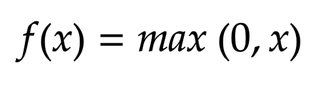

The neural network consist of 2 layers with 32 neurons in the first and 16 neurons in the second 

In [13]:
input_features = X_train.shape[1]
# Create a Sequential model
input_shape = (6,)
classes=y_train.unique()
# Create a Sequential model with an Input layer
classifier1 = Sequential()

# Add the Input layer
classifier1.add(Input(shape=input_shape))

# Adding hidden layers
classifier1.add(Dense(units=32, activation='relu'))
classifier1.add(Dense(units=16, activation='relu'))
# Adding the output layer
classifier1.add(Dense(units=12, activation='softmax')) 

# Compiling the model
classifier1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Fitting the model to the Training set
classifier1.fit(X_train, y_train_encoded,validation_data=(X_val,y_val_encoded),batch_size=256, epochs=50, verbose=1)

Epoch 1/50


2024-05-14 09:58:36.089848: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 108550296 exceeds 10% of free system memory.
2024-05-14 09:58:36.870540: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-14 09:58:37.005782: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-14 09:58:37.021915: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-14 09:58:38.281846: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.


17668/17668 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8008 - loss: 0.6500 - val_accuracy: 0.8606 - val_loss: 0.4430
Epoch 2/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.8615 - loss: 0.4408 - val_accuracy: 0.8644 - val_loss: 0.4303
Epoch 3/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8645 - loss: 0.4289 - val_accuracy: 0.8655 - val_loss: 0.4227
Epoch 4/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8661 - loss: 0.4220 - val_accuracy: 0.8659 - val_loss: 0.4186
Epoch 5/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.8676 - loss: 0.4165 - val_accuracy: 0.8666 - val_loss: 0.4158
Epoch 6/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.8683 - loss: 0.4136 - val_accuracy: 0.8677 - val_loss: 0.4122
Epoch 7/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.8690 - loss: 0.4114 - val_accuracy: 0.8690 - val_loss: 0.4099
Epoch 8/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8691 - lo

In [14]:
# Evaluate on the training set
train_acc_classifier1 = classifier1.evaluate(X_train, y_train_encoded, batch_size=256)
print('Train accuracy classifier1:', train_acc_classifier1)

17668/17668 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.8746 - loss: 0.3908
Train accuracy classifier1: [0.39106589555740356, 0.8745790719985962]


In [15]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('*'*20)
test_acc_classifier1 = classifier1.evaluate(X_test, y_test_encoded,
                            batch_size=256)
print('Test accuracy classifier1:', test_acc_classifier1)

30288/30288 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step
********************
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8743 - loss: 0.3917
Test accuracy classifier1: [0.39191195368766785, 0.8741952180862427]


In [17]:
print("Classification report on full data classifier1 :\n",classification_report(y_test_encoded, y_pred_classes))

Classification report on full data classifier1 :
               precision    recall  f1-score   support

           0       0.74      0.86      0.80    179755
           1       0.90      0.79      0.84     43629
           2       0.46      0.09      0.14     38315
           3       0.33      0.00      0.00     11438
           4       0.29      0.00      0.00      9912
           5       0.74      0.90      0.81    111147
           6       0.99      1.00      0.99    435733
           7       0.99      1.00      1.00     64398
           8       0.75      0.87      0.81     59086
           9       0.59      0.45      0.51      8335
          10       0.46      0.07      0.12      6279
          11       0.57      0.08      0.14      1173

    accuracy                           0.87    969200
   macro avg       0.65      0.51      0.51    969200
weighted avg       0.85      0.87      0.85    969200



We can see that even with the high accuracy given , the model still does not predict all classes of the model due to the unbalence in data ,in which we see that targets 4 and 5 are not predicted correctly at all with 0 in f1-score

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train_encoded)
y_onehot_test = label_binarizer.transform(y_test_encoded)
y_onehot_test.shape  # (n_samples, n_classes)
y_pred_classes_bin=label_binarizer.transform(y_pred_classes)

In [ ]:
class_of_interest=np.unique(y_train_encoded)

In [18]:
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)

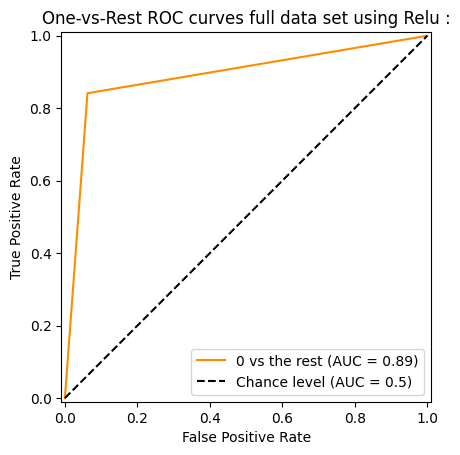

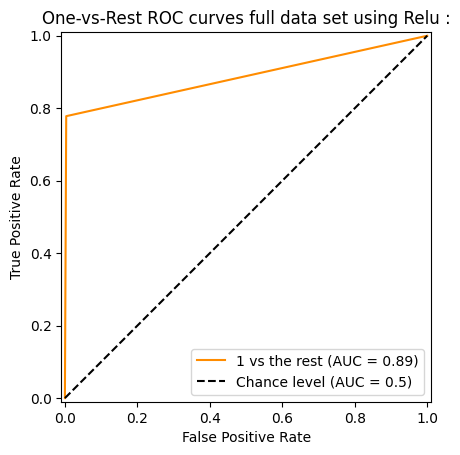

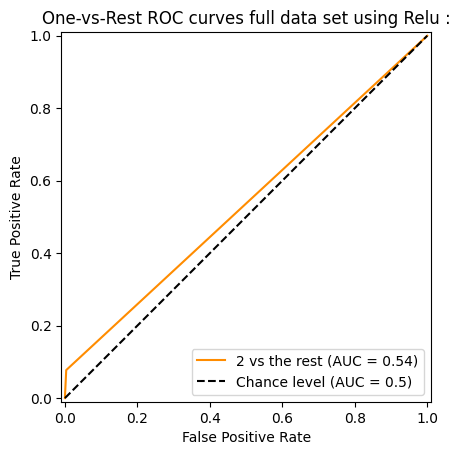

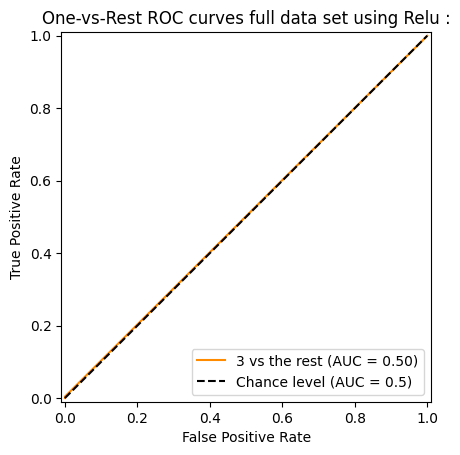

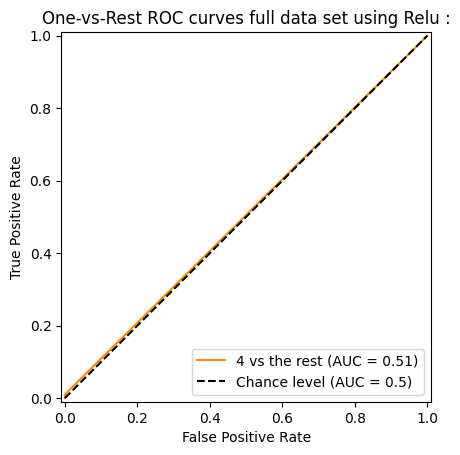

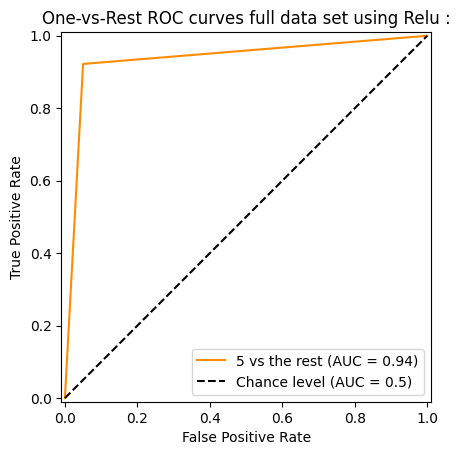

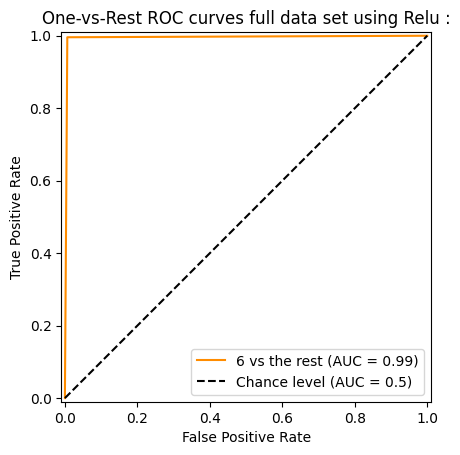

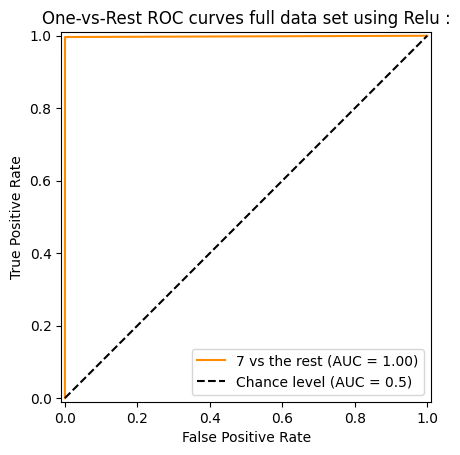

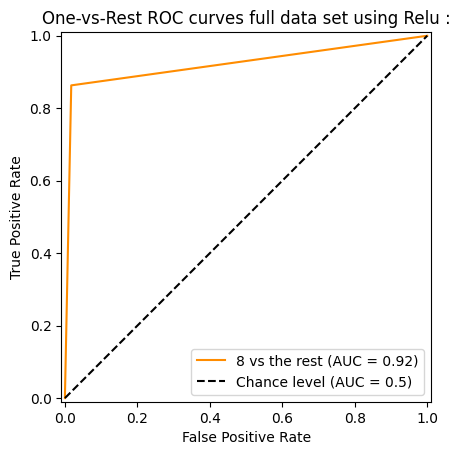

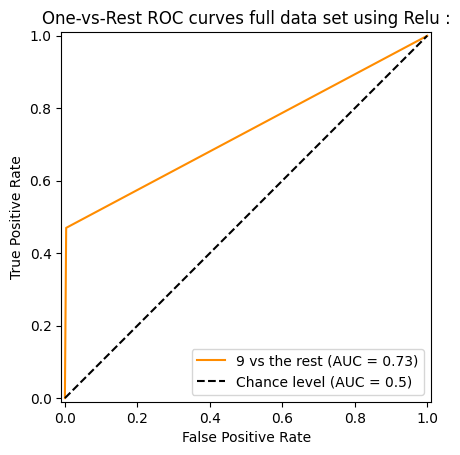

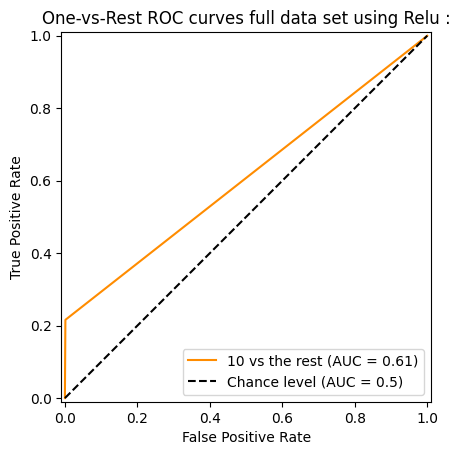

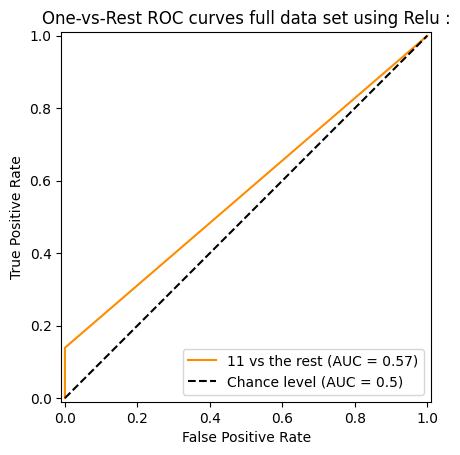

In [19]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
for class_id in class_of_interest:  
    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_classes_bin[:, class_id],
        name=f"{class_id} vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-Rest ROC curves:",
    )

The ROC plot proved that some target levels are not covered by this model

In [47]:
#save classifier1 model 
from joblib import dump 
dump(classifier1,"classifier1.joblib")

['classifier1.joblib']

<h3>2-Using Sigmoid </h3>

This function takes any real value as input and outputs values in the range of 0 to 1. 

The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0, as shown below.

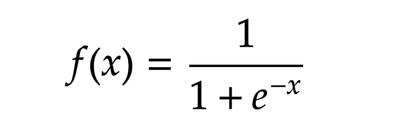

In [48]:
##Sigmoid 
input_features = X_train.shape[1]
# Create a Sequential model
input_shape = (6,)
# Create a Sequential model with an Input layer
classifier2 = Sequential()

# Add the Input layer
classifier2.add(Input(shape=input_shape))

# Adding hidden layers
classifier2.add(Dense(units=32, activation='sigmoid'))
classifier2.add(Dense(units=16, activation='sigmoid'))
# Adding the output layer
classifier2.add(Dense(units=12, activation='softmax'))

# Compiling the model
classifier2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [49]:
# Fitting the model to the Training set
classifier2.fit(X_train, y_train_encoded,validation_data=(X_val,y_val_encoded),batch_size=256, epochs=50, verbose=1)

Epoch 1/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.6886 - loss: 0.9580 - val_accuracy: 0.8390 - val_loss: 0.5144
Epoch 2/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8437 - loss: 0.4991 - val_accuracy: 0.8522 - val_loss: 0.4688
Epoch 3/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8540 - loss: 0.4630 - val_accuracy: 0.8578 - val_loss: 0.4511
Epoch 4/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.8583 - loss: 0.4488 - val_accuracy: 0.8603 - val_loss: 0.4409
Epoch 5/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.8609 - loss: 0.4396 - val_accuracy: 0.8615 - val_loss: 0.4345
Epoch 6/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.8621 - loss: 0.4337 - val_accuracy: 0.8624 - val_loss: 0.4301
Epoch 7/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.8634 - loss: 0.4287 - val_accuracy: 0.8640 - val_loss: 0.4273
Epoch 8/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 

In [22]:
print("Classification report on full data classifier2 :\n",classification_report(y_test_encoded, y_pred_classes))

/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification report on full data classifier2 :
               precision    recall  f1-score   support

           0       0.19      1.00      0.31    179755
           1       0.00      0.00      0.00     43629
           2       0.00      0.00      0.00     38315
           3       0.00      0.00      0.00     11438
           4       0.00      0.00      0.00      9912
           5       0.00      0.00      0.00    111147
           6       0.00      0.00      0.00    435733
           7       0.00      0.00      0.00     64398
           8       0.00      0.00      0.00     59086
           9       0.00      0.00      0.00      8335
          10       0.00      0.00      0.00      6279
          11       0.00      0.00      0.00      1173

    accuracy                           0.19    969200
   macro avg       0.02      0.08      0.03    969200
weighted avg       0.03      0.19      0.06    969200



/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Despite the high accuracy the classification report was bad 

In [9]:
from joblib import dump 
#save classifier2 model 
dump(classifier2,"classifier2_sigmoid.joblib")

['classifier2_sigmoid.joblib']

<h3>3-Using Swish</h3>

It is a self-gated activation function developed by researchers at Google. 

Swish consistently matches or outperforms ReLU activation function on deep networks applied to various challenging domains such as image classification, machine translation etc. 

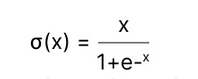

In [35]:
#swish 
input_features = X_train.shape[1]
# Create a Sequential model
input_shape = (6,)
# Create a Sequential model with an Input layer
classifier3 = Sequential()

# Add the Input layer
classifier3.add(Input(shape=input_shape))

# Adding hidden layers
classifier3.add(Dense(units=32, activation='swish'))
classifier3.add(Dense(units=16, activation='swish'))
# Adding the output layer
classifier3.add(Dense(units=12, activation='softmax'))

# Compiling the model
classifier3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [36]:
# Fitting the model to the Training set
classifier3.fit(X_train, y_train_encoded,validation_data=(X_val,y_val_encoded),batch_size=256, epochs=50, verbose=1)

Epoch 1/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.7840 - loss: 0.6914 - val_accuracy: 0.8602 - val_loss: 0.4508
Epoch 2/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.8607 - loss: 0.4449 - val_accuracy: 0.8638 - val_loss: 0.4327
Epoch 3/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.8650 - loss: 0.4290 - val_accuracy: 0.8653 - val_loss: 0.4240
Epoch 4/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.8666 - loss: 0.4224 - val_accuracy: 0.8673 - val_loss: 0.4187
Epoch 5/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.8686 - loss: 0.4167 - val_accuracy: 0.8698 - val_loss: 0.4150
Epoch 6/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.8694 - loss: 0.4129 - val_accuracy: 0.8697 - val_loss: 0.4119
Epoch 7/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.8701 - loss: 0.4103 - val_accuracy: 0.8708 - val_loss: 0.4104
Epoch 8/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 

In [38]:
# Evaluate on the training set
train_acc_classifier3 = classifier3.evaluate(X_train, y_train_encoded, batch_size=256)
print('Train accuracy classifier3:', train_acc_classifier3)# Predicting the Test set results
y_pred = classifier3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print('*'*20)
test_acc_classifier3 = classifier3.evaluate(X_test, y_test_encoded,
                            batch_size=256)
print('Test accuracy classifier3:', test_acc_classifier3)

17668/17668 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8754 - loss: 0.3872
Train accuracy classifier3: [0.3873499631881714, 0.8754563927650452]
30288/30288 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step
********************
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8754 - loss: 0.3882
Test accuracy classifier3: [0.3884434998035431, 0.87511146068573]


In [39]:
print("Classification report on data with swish :\n",classification_report(y_test_encoded, y_pred_classes))

Classification report on data with swish :
               precision    recall  f1-score   support

           0       0.76      0.85      0.80    179755
           1       0.90      0.81      0.85     43629
           2       0.41      0.14      0.21     38315
           3       0.32      0.01      0.02     11438
           4       0.28      0.00      0.01      9912
           5       0.74      0.90      0.81    111147
           6       0.99      1.00      0.99    435733
           7       1.00      1.00      1.00     64398
           8       0.76      0.87      0.81     59086
           9       0.56      0.47      0.51      8335
          10       0.43      0.21      0.28      6279
          11       0.60      0.21      0.32      1173

    accuracy                           0.88    969200
   macro avg       0.64      0.54      0.55    969200
weighted avg       0.86      0.88      0.86    969200



In [58]:
from joblib import dump
#save classifier3 model 
dump(classifier3,"classifier3_swish.joblib")

['classifier3_swish.joblib']

<h3>4-Using Leaky_reLU</h3>

Leaky ReLU is an improved version of ReLU function to solve the Dying ReLU problem as it has a small positive slope in the negative area.

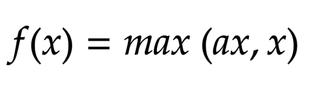

In [14]:
#leaky relu 
input_features = X_train.shape[1]
# Create a Sequential model
input_shape = (6,)
classes=y_train.unique()
# Create a Sequential model with an Input layer
classifier_LeakyReLU = Sequential()
Leaky_reLU=LeakyReLU(alpha=0.2)
# Add the Input layer
classifier_LeakyReLU.add(Input(shape=input_shape))

# Adding hidden layers
classifier_LeakyReLU.add(Dense(units=32, activation=Leaky_reLU))
classifier_LeakyReLU.add(Dense(units=16, activation=Leaky_reLU))
# Adding the output layer
classifier_LeakyReLU.add(Dense(units=12, activation='softmax')) 

# Compiling the model
classifier_LeakyReLU.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Fitting the model to the Training set
classifier_LeakyReLU.fit(X_train, y_train_encoded,validation_data=(X_val,y_val_encoded),batch_size=256, epochs=50, verbose=1)

2024-05-08 20:29:46.253710: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 108550296 exceeds 10% of free system memory.


Epoch 1/50


2024-05-08 20:29:46.879983: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-08 20:29:47.054174: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-08 20:29:47.078570: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-08 20:29:49.796051: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.


17668/17668 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - accuracy: 0.7882 - loss: 0.6759 - val_accuracy: 0.8564 - val_loss: 0.4527
Epoch 2/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.8595 - loss: 0.4460 - val_accuracy: 0.8605 - val_loss: 0.4378
Epoch 3/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.8627 - loss: 0.4347 - val_accuracy: 0.8649 - val_loss: 0.4291
Epoch 4/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8640 - loss: 0.4286 - val_accuracy: 0.8640 - val_loss: 0.4247
Epoch 5/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8654 - loss: 0.4234 - val_accuracy: 0.8646 - val_loss: 0.4224
Epoch 6/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8665 - loss: 0.4197 - val_accuracy: 0.8661 - val_loss: 0.4178
Epoch 7/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.8672 - loss: 0.4167 - val_accuracy: 0.8674 - val_loss: 0.4156
Epoch 8/50
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.8678 - lo

In [21]:
# Evaluate on the training set
train_acc_classifier_LeakyReLU = classifier_LeakyReLU.evaluate(X_train, y_train_encoded, batch_size=256)
print('Train accuracy classifier_LeakyReLU:', train_acc_classifier_LeakyReLU)# Predicting the Test set results
y_pred = classifier_LeakyReLU.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('*'*20)
test_acc_classifier_LeakyReLU = classifier_LeakyReLU.evaluate(X_test, y_test_encoded,
                            batch_size=256)
print('Test accuracy classifier_LeakyReLU:', test_acc_classifier_LeakyReLU)

17668/17668 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8711 - loss: 0.3990
Train accuracy classifier_LeakyReLU: [0.39926350116729736, 0.8711521029472351]
30288/30288 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step
********************
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8710 - loss: 0.4003
Test accuracy classifier_LeakyReLU: [0.40038931369781494, 0.8709502816200256]


In [31]:
print("Classification report on data with leaky relu :\n",classification_report(y_test_encoded, y_pred_classes))

Classification report on data with leaky relu :
               precision    recall  f1-score   support

           0       0.75      0.84      0.79    179755
           1       0.85      0.84      0.84     43629
           2       0.44      0.06      0.11     38315
           3       0.24      0.01      0.01     11438
           4       0.32      0.00      0.00      9912
           5       0.70      0.92      0.80    111147
           6       0.99      1.00      0.99    435733
           7       1.00      1.00      1.00     64398
           8       0.78      0.84      0.81     59086
           9       0.59      0.40      0.47      8335
          10       0.53      0.12      0.20      6279
          11       0.47      0.14      0.22      1173

    accuracy                           0.87    969200
   macro avg       0.64      0.51      0.52    969200
weighted avg       0.85      0.87      0.85    969200



In [18]:
from joblib import dump
#save classifier_LeakyReLU model 
dump(classifier_LeakyReLU,"classifier_LeakyReLU.joblib")

['classifier_LeakyReLU.joblib']

<h2>under sampling </h2>

Due to the unbalance in data, undersampling was conducted

In [71]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=0)

X = final_df.drop('label', axis=1)
y = final_df['label']

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [72]:
undersampled_data["label"].value_counts()

label
1      7865
2      7865
3      7865
4      7865
5      7865
6      7865
7      7865
8      7865
13     7865
14     7865
130    7865
140    7865
Name: count, dtype: int64

In [73]:
features_under_sample = undersampled_data[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"]]
label__under_sample = undersampled_data["label"]

X_train, X_temp, y_train, y_temp = train_test_split(features_under_sample, label__under_sample, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train.shape, " --- y_train = ", y_train.shape )
print ("X_val =",X_val.shape, " --- y_val = ", y_val.shape )
print ("X_test =",X_test.shape, " --- y_test = ", y_test.shape )

X_train = (66066, 6)  --- y_train =  (66066,)
X_val = (14157, 6)  --- y_val =  (14157,)
X_test = (14157, 6)  --- y_test =  (14157,)


In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train) 
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test) 
y_val_encoded=encoder.transform(y_val) 

<h3>1-Using Relu</h3>

In [34]:
input_features = X_train.shape[1]
# Create a Sequential model
input_shape = (6,)
classes=y_train.unique()
# Create a Sequential model with an Input layer
classifier_undersample = Sequential()

# Add the Input layer
classifier_undersample.add(Input(shape=input_shape))

# Adding hidden layers
classifier_undersample.add(Dense(units=32, activation='relu'))
classifier_undersample.add(Dense(units=16, activation='relu'))
# Adding the output layer
classifier_undersample.add(Dense(units=12, activation='softmax')) 

# Compiling the model
classifier_undersample.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [35]:
# Fitting the model to the Training set
classifier_undersample.fit(X_train, y_train_encoded,validation_data=(X_val,y_val_encoded),batch_size=128, epochs=50, verbose=1)

Epoch 1/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2512 - loss: 2.1946 - val_accuracy: 0.4592 - val_loss: 1.5696
Epoch 2/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4786 - loss: 1.4946 - val_accuracy: 0.5156 - val_loss: 1.3638
Epoch 3/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5320 - loss: 1.3348 - val_accuracy: 0.5546 - val_loss: 1.2720
Epoch 4/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5599 - loss: 1.2627 - val_accuracy: 0.5633 - val_loss: 1.2248
Epoch 5/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5711 - loss: 1.2153 - val_accuracy: 0.5791 - val_loss: 1.1896
Epoch 6/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5844 - loss: 1.1763 - val_accuracy: 0.5893 - val_loss: 1.1616
Epoch 7/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5981 - loss: 1.1456 - val_accuracy: 0.5943 - val_loss: 1.1444
Epoch 8/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5988 - loss: 1.1414 - val_accuracy

In [36]:
# Evaluate on the training set
train_acc_classifier_undersample = classifier_undersample.evaluate(X_train, y_train_encoded, batch_size=128)
print('Train accuracy classifier_undersample:', train_acc_classifier_undersample)

517/517 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6576 - loss: 0.9828
Train accuracy classifier_undersample: [0.9823652505874634, 0.6575091481208801]


In [37]:
# Predicting the Test set results
y_pred = classifier_undersample.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('*'*20)
test_acc_classifier_undersample = classifier_undersample.evaluate(X_test, y_test_encoded,
                            batch_size=128)
print('Test accuracy classifier_undersample:', test_acc_classifier_undersample)

443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
********************
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6441 - loss: 1.0103
Test accuracy classifier_undersample: [0.9858238101005554, 0.6507028341293335]


In [38]:
print("Classification report on full data classifier_undersample :\n",classification_report(y_test_encoded, y_pred_classes))

Classification report on full data classifier_undersample :
               precision    recall  f1-score   support

           0       0.41      0.36      0.38      1159
           1       0.82      0.79      0.80      1174
           2       0.42      0.45      0.44      1184
           3       0.53      0.34      0.41      1164
           4       0.50      0.36      0.42      1241
           5       0.60      0.74      0.67      1216
           6       0.95      0.99      0.97      1236
           7       0.99      1.00      0.99      1099
           8       0.59      0.61      0.60      1233
           9       0.67      0.67      0.67      1164
          10       0.60      0.74      0.66      1158
          11       0.66      0.78      0.71      1129

    accuracy                           0.65     14157
   macro avg       0.64      0.65      0.64     14157
weighted avg       0.64      0.65      0.64     14157



Despite the lower accuracy (0.6441) compared to the above  results ,significant improvement is clearly showed in teh classification report by successufully predicting all the classes

In [39]:
from joblib import dump 
#save classifier2 model 
dump(classifier_undersample,"classifier_undersample.joblib")

['classifier_undersample.joblib']

<h3>2-using Swish</h3>

In [75]:
#swish 
input_features = X_train.shape[1]
# Create a Sequential model
input_shape = (6,)
# Create a Sequential model with an Input layer
classifier_undersample_swish = Sequential()

# Add the Input layer
classifier_undersample_swish.add(Input(shape=input_shape))

# Adding hidden layers
classifier_undersample_swish.add(Dense(units=32, activation='swish'))
classifier_undersample_swish.add(Dense(units=16, activation='swish'))
# Adding the output layer
classifier_undersample_swish.add(Dense(units=12, activation='softmax'))

# Compiling the model
classifier_undersample_swish.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [76]:
# Fitting the model to the Training set
classifier_undersample_swish.fit(X_train, y_train_encoded,validation_data=(X_val,y_val_encoded),batch_size=128, epochs=50, verbose=1)

Epoch 1/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.2360 - loss: 2.2815 - val_accuracy: 0.4466 - val_loss: 1.6121
Epoch 2/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4729 - loss: 1.5075 - val_accuracy: 0.4983 - val_loss: 1.3998
Epoch 3/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5176 - loss: 1.3712 - val_accuracy: 0.5255 - val_loss: 1.3310
Epoch 4/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5358 - loss: 1.3164 - val_accuracy: 0.5490 - val_loss: 1.2800
Epoch 5/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5534 - loss: 1.2733 - val_accuracy: 0.5580 - val_loss: 1.2492
Epoch 6/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5652 - loss: 1.2274 - val_accuracy: 0.5710 - val_loss: 1.2208
Epoch 7/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5761 - loss: 1.2117 - val_accuracy: 0.5784 - val_loss: 1.2051
Epoch 8/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5819 - loss: 1.1938 - val_accuracy

In [77]:
# Evaluate on the training set
train_acc_classifier_undersample = classifier_undersample_swish.evaluate(X_train, y_train_encoded, batch_size=128)
print('Train accuracy classifier_undersample uisng swish :', train_acc_classifier_undersample)

517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6430 - loss: 1.0157
Train accuracy classifier_undersample uisng swish : [1.0170531272888184, 0.6416159868240356]


In [78]:
# Predicting the Test set results
y_pred = classifier_undersample_swish.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('*'*20)
test_acc_classifier_undersample = classifier_undersample_swish.evaluate(X_test, y_test_encoded,
                            batch_size=128)
print('Test accuracy classifier_undersample using swish:', test_acc_classifier_undersample)

443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
********************
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6319 - loss: 1.0431
Test accuracy classifier_undersample using swish: [1.0212969779968262, 0.6380589008331299]


In [79]:
print("Classification report on full data classifier_undersample using swish :\n",classification_report(y_test_encoded, y_pred_classes))

Classification report on full data classifier_undersample using swish :
               precision    recall  f1-score   support

           0       0.43      0.32      0.37      1159
           1       0.84      0.80      0.82      1174
           2       0.40      0.35      0.37      1184
           3       0.45      0.36      0.40      1164
           4       0.45      0.33      0.38      1241
           5       0.55      0.80      0.65      1216
           6       0.94      0.98      0.96      1236
           7       0.99      1.00      1.00      1099
           8       0.61      0.57      0.59      1233
           9       0.67      0.67      0.67      1164
          10       0.58      0.73      0.64      1158
          11       0.65      0.77      0.70      1129

    accuracy                           0.64     14157
   macro avg       0.63      0.64      0.63     14157
weighted avg       0.63      0.64      0.63     14157



In [80]:
from joblib import dump 
#save classifier_undersample_swish model 
dump(classifier_undersample_swish,"classifier_undersample_swish.joblib")

['classifier_undersample_swish.joblib']

<h2>Using Timestamp in ANN</h2>

Aggregate on the timestamp column and compare with the earlier results 

In [4]:
#handle the date 
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])

# Extract year, month, day, hour, minute, second, and millisecond into separate columns
final_df['year'] = final_df['timestamp'].dt.year
final_df['month'] = final_df['timestamp'].dt.month
final_df['day'] = final_df['timestamp'].dt.day
final_df['hour'] = final_df['timestamp'].dt.hour
final_df['minute'] = final_df['timestamp'].dt.minute
final_df['second'] = final_df['timestamp'].dt.second
final_df['millisecond'] = final_df['timestamp'].dt.microsecond // 1000

final_df.drop(columns=['timestamp'], inplace=True)

final_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0,year,month,day,hour,minute,second,millisecond
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,NaN,NaN,2019,1,12,0,0,0,0
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,NaN,NaN,2019,1,12,0,0,0,10
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,NaN,NaN,2019,1,12,0,0,0,20
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,NaN,NaN,2019,1,12,0,0,0,30
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,NaN,NaN,2019,1,12,0,0,0,40


In [5]:
final_df

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0,year,month,day,hour,minute,second,millisecond
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,NaN,NaN,2019,1,12,0,0,0,0
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,NaN,NaN,2019,1,12,0,0,0,10
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,NaN,NaN,2019,1,12,0,0,0,20
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,NaN,NaN,2019,1,12,0,0,0,30
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,NaN,NaN,2019,1,12,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461323,-1.012939,-0.110840,-0.218994,-0.970215,-0.313232,0.124268,3,NaN,NaN,2019,1,12,0,59,56,940
6461324,-0.979492,-0.089355,-0.216553,-0.966553,-0.234619,0.113770,3,NaN,NaN,2019,1,12,0,59,56,960
6461325,-0.969971,-0.057861,-0.204590,-0.997803,-0.097656,0.065186,3,NaN,NaN,2019,1,12,0,59,56,980
6461326,-1.001953,-0.029785,-0.234863,-1.000000,-0.145996,0.061523,3,NaN,NaN,2019,1,12,0,59,57,0


In [6]:
final_df=final_df.drop(["index","Unnamed: 0"],axis=1)

In [7]:
#test and train split
from sklearn.model_selection import train_test_split
features = final_df[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z","year","month","day","hour","minute","second","millisecond"]]
label = final_df["label"]

X_train_with_date, X_temp, y_train_date, y_temp = train_test_split(features, label, test_size=0.3, random_state=42)
X_val_with_date, X_test_with_date, y_val_with_date, y_test_with_date = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train_with_date.shape, " --- y_train = ", y_train_date.shape )
print ("X_val =",X_val_with_date.shape, " --- y_val = ", y_val_with_date.shape )
print ("X_test =",X_test_with_date.shape, " --- y_test = ", y_test_with_date.shape )

X_train = (4522929, 13)  --- y_train =  (4522929,)
X_val = (969199, 13)  --- y_val =  (969199,)
X_test = (969200, 13)  --- y_test =  (969200,)


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train_date) 
y_train_date_encoded = encoder.transform(y_train_date)
y_test_with_date_encoded = encoder.transform(y_test_with_date) 
y_val_with_date_encoded=encoder.transform(y_val_with_date) 

In [11]:
# relu 
input_features = X_train_with_date.shape[1]
# Create a Sequential model
input_shape = (13,)
# Create a Sequential model with an Input layer
classifier_date = Sequential()

# Add the Input layer
classifier_date.add(Input(shape=input_shape))

# Adding hidden layers
classifier_date.add(Dense(units=32, activation='relu'))
classifier_date.add(Dense(units=16, activation='relu'))
# Adding the output layer
classifier_date.add(Dense(units=12, activation='softmax'))

# Compiling the model
classifier_date.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Fitting the model to the Training set
classifier_date.fit(X_train_with_date, y_train_date_encoded,
                    batch_size=256, epochs=20, verbose=1)

2024-05-25 10:12:22.033998: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235192308 exceeds 10% of free system memory.
2024-05-25 10:12:24.207291: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.


Epoch 1/20


2024-05-25 10:12:25.776427: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-25 10:12:25.809195: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-25 10:12:29.808971: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.


17668/17668 ━━━━━━━━━━━━━━━━━━━━ 179s 10ms/step - accuracy: 0.5781 - loss: 3.6042
Epoch 2/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 179s 10ms/step - accuracy: 0.6689 - loss: 1.0894
Epoch 3/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 318s 17ms/step - accuracy: 0.7105 - loss: 0.8841
Epoch 4/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 209s 10ms/step - accuracy: 0.7497 - loss: 0.7623
Epoch 5/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 181s 9ms/step - accuracy: 0.7763 - loss: 0.7132
Epoch 6/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 213s 10ms/step - accuracy: 0.7872 - loss: 0.6880
Epoch 7/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 156s 9ms/step - accuracy: 0.8075 - loss: 0.6338
Epoch 8/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 192s 11ms/step - accuracy: 0.8203 - loss: 0.5801
Epoch 9/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 259s 14ms/step - accuracy: 0.8331 - loss: 0.5421
Epoch 10/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 179s 10ms/step - accuracy: 0.8395 - loss: 0.5209
Epoch 11/20
17668/17668 ━━━━━━━━━━━━━━━━━━━━ 201s 11ms/step - accuracy: 0.8422 - l

In [13]:
# Evaluate on the training set
train_acc_classifier_date = classifier_date.evaluate(X_train_with_date, y_train_date_encoded, batch_size=256)
print('Train accuracy:', train_acc_classifier_date)# Predicting the Test set results
y_pred = classifier_date.predict(X_test_with_date)
y_pred_classes = np.argmax(y_pred, axis=1)

print('*'*20)
test_acc_classifier_date = classifier_date.evaluate(X_test_with_date, y_test_with_date_encoded,
                            batch_size=256)
print('Test accuracy:', test_acc_classifier_date)

17668/17668 ━━━━━━━━━━━━━━━━━━━━ 252s 14ms/step - accuracy: 0.8475 - loss: 0.4817
Train accuracy: [0.4821398854255676, 0.8475799560546875]
30288/30288 ━━━━━━━━━━━━━━━━━━━━ 989s 33ms/step
********************
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8476 - loss: 0.4829
Test accuracy: [0.48257604241371155, 0.8473926782608032]


In [28]:
print("Classification report on data with date :\n",classification_report(y_test_with_date_encoded, y_pred_classes))

/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification report on data with date :
               precision    recall  f1-score   support

           0       0.74      0.80      0.76    179755
           1       0.87      0.71      0.78     43629
           2       0.26      0.00      0.00     38315
           3       0.00      0.00      0.00     11438
           4       0.50      0.00      0.00      9912
           5       0.64      0.92      0.75    111147
           6       0.98      1.00      0.99    435733
           7       0.99      0.99      0.99     64398
           8       0.73      0.85      0.79     59086
           9       0.54      0.23      0.32      8335
          10       0.17      0.01      0.03      6279
          11       0.64      0.03      0.06      1173

    accuracy                           0.85    969200
   macro avg       0.59      0.46      0.46    969200
weighted avg       0.82      0.85      0.83    969200



/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
from joblib import dump
#save classifier_date model 
dump(classifier_date,"classifier_date.joblib")

['classifier_date.joblib']

<h3>Under sampling with date </h3>

In [13]:
final_df

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,year,month,day,hour,minute,second,millisecond
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,2019,1,12,0,0,0,0
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,2019,1,12,0,0,0,10
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,2019,1,12,0,0,0,20
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,2019,1,12,0,0,0,30
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,2019,1,12,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461323,-1.012939,-0.110840,-0.218994,-0.970215,-0.313232,0.124268,3,2019,1,12,0,59,56,940
6461324,-0.979492,-0.089355,-0.216553,-0.966553,-0.234619,0.113770,3,2019,1,12,0,59,56,960
6461325,-0.969971,-0.057861,-0.204590,-0.997803,-0.097656,0.065186,3,2019,1,12,0,59,56,980
6461326,-1.001953,-0.029785,-0.234863,-1.000000,-0.145996,0.061523,3,2019,1,12,0,59,57,0


In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=0)

X = final_df.drop('label', axis=1)
y = final_df['label']

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [15]:
undersampled_data["label"].value_counts()

label
1      7865
2      7865
3      7865
4      7865
5      7865
6      7865
7      7865
8      7865
13     7865
14     7865
130    7865
140    7865
Name: count, dtype: int64

In [16]:
#test and train split
from sklearn.model_selection import train_test_split
features = final_df[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z","year","month","day","hour","minute","second","millisecond"]]
label = final_df["label"]

X_train_with_date, X_temp, y_train_date, y_temp = train_test_split(features, label, test_size=0.3, random_state=42)
X_val_with_date, X_test_with_date, y_val_with_date, y_test_with_date = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train_with_date.shape, " --- y_train = ", y_train_date.shape )
print ("X_val =",X_val_with_date.shape, " --- y_val = ", y_val_with_date.shape )
print ("X_test =",X_test_with_date.shape, " --- y_test = ", y_test_with_date.shape )

X_train = (4522929, 13)  --- y_train =  (4522929,)
X_val = (969199, 13)  --- y_val =  (969199,)
X_test = (969200, 13)  --- y_test =  (969200,)


In [17]:
y_train_date_encoded = encoder.transform(y_train_date)
y_test_with_date_encoded = encoder.transform(y_test_with_date) 
y_val_with_date_encoded=encoder.transform(y_val_with_date) 

In [18]:
input_features = X_train.shape[1]
# Create a Sequential model
input_shape = (13,)
classes=y_train.unique()
# Create a Sequential model with an Input layer
classifier_undersample_with_date = Sequential()

# Add the Input layer
classifier_undersample_with_date.add(Input(shape=input_shape))

# Adding hidden layers
classifier_undersample_with_date.add(Dense(units=32, activation='relu'))
classifier_undersample_with_date.add(Dense(units=16, activation='relu'))
# Adding the output layer
classifier_undersample_with_date.add(Dense(units=12, activation='softmax')) 

# Compiling the model
classifier_undersample_with_date.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Fitting the model to the Training set
classifier_undersample_with_date.fit(X_train_with_date, y_train_date_encoded,validation_data=(X_val_with_date,y_val_with_date_encoded),
                    batch_size=512, epochs=20, verbose=1)

2024-05-24 18:06:06.400451: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235192308 exceeds 10% of free system memory.
2024-05-24 18:06:10.221349: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.


Epoch 1/20


2024-05-24 18:06:11.145946: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-24 18:06:11.173085: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.
2024-05-24 18:06:16.752661: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36183432 exceeds 10% of free system memory.


8834/8834 ━━━━━━━━━━━━━━━━━━━━ 116s 12ms/step - accuracy: 0.4983 - loss: 10.6150 - val_accuracy: 0.6165 - val_loss: 1.2311
Epoch 2/20
8834/8834 ━━━━━━━━━━━━━━━━━━━━ 503s 53ms/step - accuracy: 0.6632 - loss: 1.1360 - val_accuracy: 0.6770 - val_loss: 1.1126
Epoch 3/20
8834/8834 ━━━━━━━━━━━━━━━━━━━━ 100s 11ms/step - accuracy: 0.6685 - loss: 1.0966 - val_accuracy: 0.6709 - val_loss: 1.0592
Epoch 4/20
8834/8834 ━━━━━━━━━━━━━━━━━━━━ 110s 12ms/step - accuracy: 0.6770 - loss: 1.0345 - val_accuracy: 0.7087 - val_loss: 0.8722
Epoch 5/20
8834/8834 ━━━━━━━━━━━━━━━━━━━━ 120s 13ms/step - accuracy: 0.7225 - loss: 0.8696 - val_accuracy: 0.6965 - val_loss: 0.8854
Epoch 6/20
8834/8834 ━━━━━━━━━━━━━━━━━━━━ 93s 10ms/step - accuracy: 0.7397 - loss: 0.8214 - val_accuracy: 0.7520 - val_loss: 0.7899
Epoch 7/20
8834/8834 ━━━━━━━━━━━━━━━━━━━━ 114s 13ms/step - accuracy: 0.7447 - loss: 0.8107 - val_accuracy: 0.7592 - val_loss: 0.7621
Epoch 8/20
8834/8834 ━━━━━━━━━━━━━━━━━━━━ 78s 9ms/step - accuracy: 0.7393 - loss

In [20]:
# Evaluate on the training set
train_acc_undersample_date = classifier_undersample_with_date.evaluate(X_train_with_date, y_train_date_encoded, batch_size=256)
print('Train accuracy:', train_acc_undersample_date)# Predicting the Test set results
y_pred = classifier_undersample_with_date.predict(X_test_with_date)
y_pred_classes = np.argmax(y_pred, axis=1)

print('*'*20)
test_acc_undersample_date = classifier_undersample_with_date.evaluate(X_test_with_date, y_test_with_date_encoded,
                            batch_size=256)
print('Test accuracy:', test_acc_undersample_date)

17668/17668 ━━━━━━━━━━━━━━━━━━━━ 115s 7ms/step - accuracy: 0.7843 - loss: 0.6797
Train accuracy: [0.6795638203620911, 0.7843291163444519]
30288/30288 ━━━━━━━━━━━━━━━━━━━━ 127s 4ms/step
********************
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7841 - loss: 0.6807
Test accuracy: [0.6794016361236572, 0.7838175892829895]


In [23]:
print("Classification report on undersample with date :\n",classification_report(y_test_with_date_encoded, y_pred_classes))

/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification report on undersample with date :
               precision    recall  f1-score   support

           0       0.55      0.75      0.64    179755
           1       0.79      0.60      0.69     43629
           2       0.00      0.00      0.00     38315
           3       0.00      0.00      0.00     11438
           4       0.00      0.00      0.00      9912
           5       0.58      0.92      0.71    111147
           6       0.97      0.99      0.98    435733
           7       0.93      0.97      0.95     64398
           8       0.00      0.00      0.00     59086
           9       0.00      0.00      0.00      8335
          10       0.00      0.00      0.00      6279
          11       0.00      0.00      0.00      1173

    accuracy                           0.78    969200
   macro avg       0.32      0.35      0.33    969200
weighted avg       0.70      0.78      0.73    969200



/home/nesrine/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
from joblib import dump
#save classifier_date model 
dump(classifier_undersample_with_date,"classifier_undersample_with_date.joblib")

['classifier_undersample_with_date.joblib']

<h2>Discussion and Evaluation</h2>

In [62]:
from sklearn.metrics import (
    matthews_corrcoef, 
    cohen_kappa_score, 
    balanced_accuracy_score, 
    classification_report
)

<b>The models condidates </b></br>
    <table border="1">
        <thead>
            <tr>
                <th>Model Configuration</th>
                <th>Accuracy</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>ANN with ReLU</td>
                <td>0.8743</td>
            </tr>
            <tr>
                <td>ANN with Sigmoid</td>
                <td>0.8713</td>
            </tr>
            <tr>
                <td>ANN with Swish</td>
                <td>0.8754</td>
            </tr>
            <tr>
                <td>ANN with Leaky ReLU</td>
                <td>0.8710 </td>
            </tr>
            <tr>
                <td>ANN with Undersample ReLU</td>
                <td>0.6441 </td>
            </tr>
            <tr>
                <td>ANN with Undersample Swish</td>
                <td>0.6319 </td>
            </tr>
            <tr>
                <td>ANN with Timestamp ReLU</td>
                <td>0.853</td>
            </tr>
            <tr>
                <td>ANN with Timestamp Undersample ReLU</td>
                <td>0.7841</td>
            </tr>
        </tbody>
    </table>

<h3>Confusion matrix</h3>

In [58]:
#undersample data 
from sklearn.pipeline import Pipeline
import joblib

# Load the saved pipeline model
classifier_undersample = joblib.load('saved_models/classifier_undersample.joblib')
y_pred_undersample=classifier_undersample.predict(X_test)
y_pred_classes = np.argmax(y_pred_undersample, axis=1)

443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


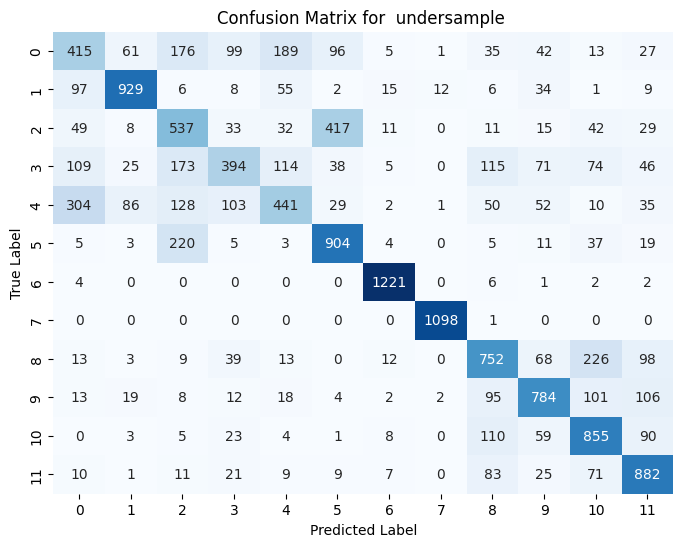

In [60]:
#confusion matrix 
cm_Ann = confusion_matrix(y_test_encoded, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_Ann, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for  undersample ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h3>ROC for best model</h3>

In [43]:
class_of_interest=np.unique(y_train_encoded)

In [44]:
#undersample data 
from sklearn.pipeline import Pipeline
import joblib

# Load the saved pipeline model
classifier_undersample = joblib.load('saved_models/classifier_undersample.joblib')
y_pred_undersample=classifier_undersample.predict(X_test)
y_pred_classes = np.argmax(y_pred_undersample, axis=1)

443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [48]:
y_pred_classes

array([10,  3,  6, ...,  5,  1,  8])

In [51]:
y_test_encoded

array([10,  3,  6, ...,  5,  4,  8])

In [53]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train_encoded)
y_onehot_test = label_binarizer.transform(y_test_encoded)
y_onehot_test.shape  # (n_samples, n_classes)
y_pred_classes_bin=label_binarizer.transform(y_pred_classes)

In [57]:
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)

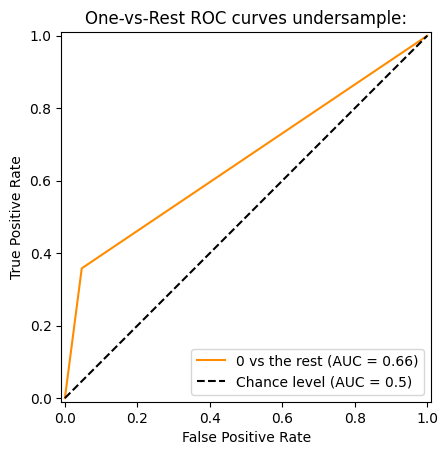

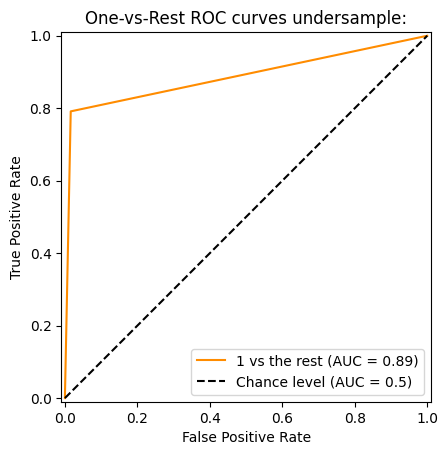

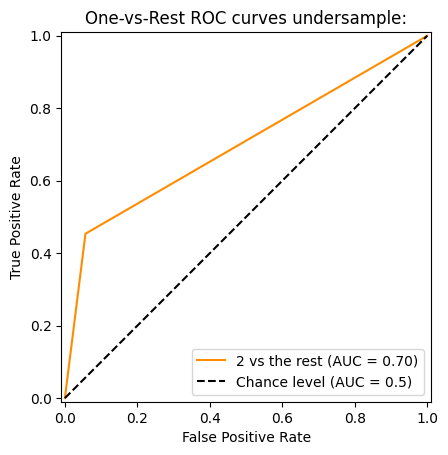

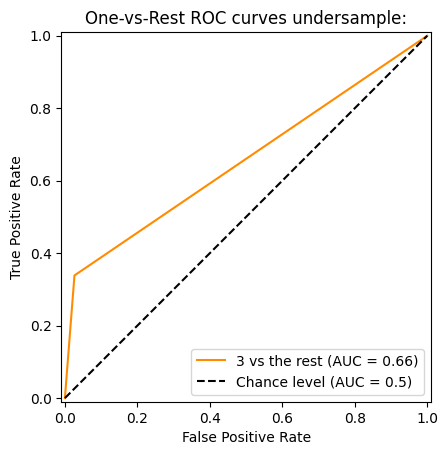

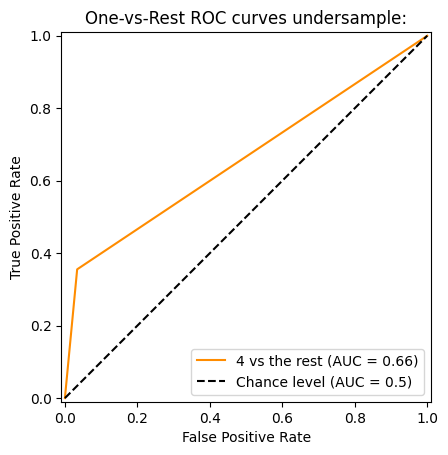

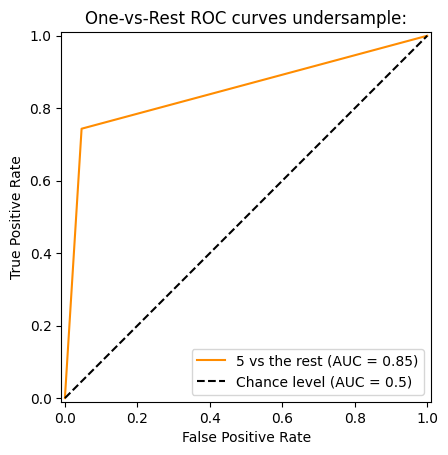

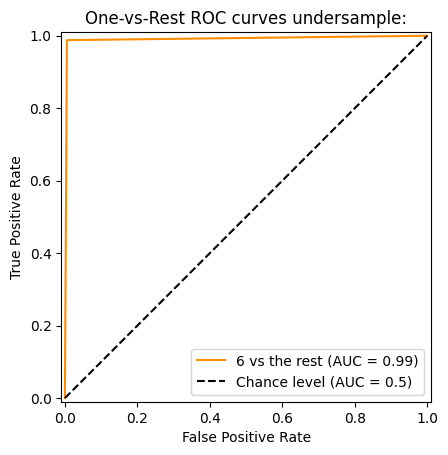

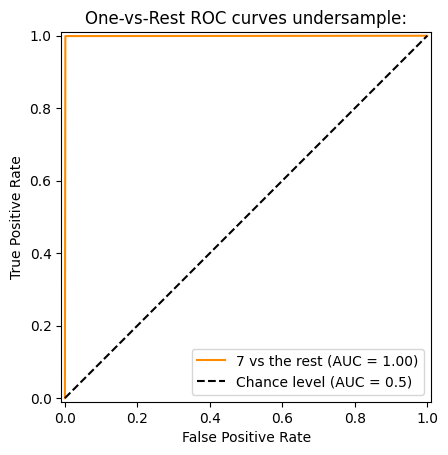

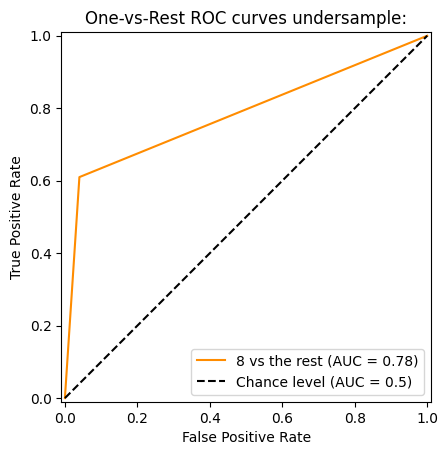

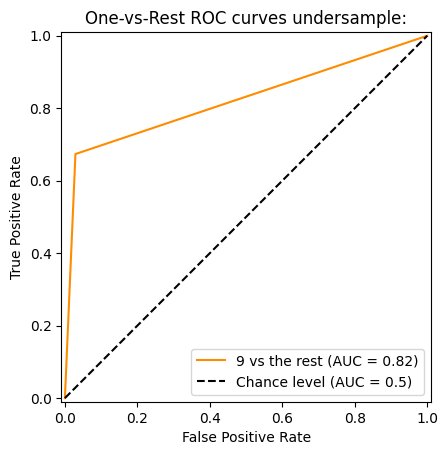

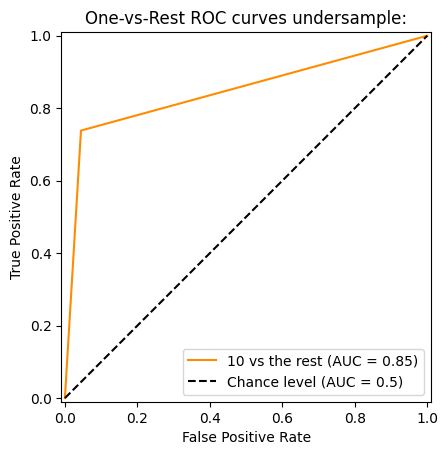

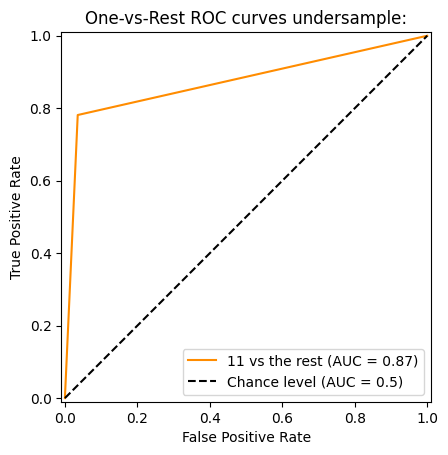

In [56]:
#ROC on under sampling without date 
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
for class_id in class_of_interest:  
    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_classes_bin[:, class_id],
        name=f"{class_id} vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-Rest ROC curves undersample:",
    )

<h3>AUC </h3>

In [65]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
class_of_interest = range(y_onehot_test.shape[1])  # Assuming y_onehot_test has shape (num_samples, num_classes)

# Initialize a dictionary to store AUC values
auc_scores = {}

# Plot ROC curves and calculate AUC
for class_id in class_of_interest:
    # Compute the ROC curve and AUC
    auc = roc_auc_score(y_onehot_test[:, class_id], y_pred_classes_bin[:, class_id])
    auc_scores[class_id] = auc


for class_id, auc in auc_scores.items():
    print(f"Class {class_id} AUC: {auc:.2f}")


Class 0 AUC: 0.66
Class 1 AUC: 0.89
Class 2 AUC: 0.70
Class 3 AUC: 0.66
Class 4 AUC: 0.66
Class 5 AUC: 0.85
Class 6 AUC: 0.99
Class 7 AUC: 1.00
Class 8 AUC: 0.78
Class 9 AUC: 0.82
Class 10 AUC: 0.85
Class 11 AUC: 0.87


Results discussion:

Indeed ,the classifier using under sampling with Relu is performing the best among all the condidates proposed ,proving promising results that can be used for further studies and purposes 

<h2>Hyper parameter tuning </h2>

In [7]:
!pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/db/5d/945296512980b0827e93418514c8be9236baa6f0a1e8ca8be3a2026665b0/keras_tuner-1.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for kt-legacy from https://files.pythonhosted.org/packages/16/53/aca9f36da2516db008017db85a1f3cafaee0efc5fc7a25d94c909651792f/kt_legacy-1.0.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import Callback



# Define input shape based on your data
input_shape = (X_train.shape[1],)  # Get the unique class labels

# Function to create your Keras model
def create_model(learning_rate):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=input_shape))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter tuning callback class
class HyperparameterTuningCallback(Callback):
    def __init__(self, tuning_metric):
        super(HyperparameterTuningCallback, self).__init__()
        self.tuning_metric = tuning_metric
        self.best_val_metric = float('-inf')  # Initialize with a low value

    def on_epoch_end(self, epoch, logs=None):
        val_metric = logs.get(self.tuning_metric)
        if val_metric > self.best_val_metric:
            self.best_val_metric = val_metric

# Define hyperparameter search space
learning_rates = [0.01, 0.001]

# Create the model
model = create_model(learning_rates[0])  # Start with initial learning rate

# Create the tuning callback
tuning_callback = HyperparameterTuningCallback(tuning_metric='val_accuracy')

# Train the model with hyperparameter tuning
for learning_rate in learning_rates:
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_val, y_val_encoded), callbacks=[tuning_callback])

# Print the best learning rate based on validation accuracy
print(f"Best Learning Rate based on Validation Accuracy: {learning_rates[tuning_callback.best_val_metric.index(max(tuning_callback.best_val_metric))]}")


/home/nesrine/virtualenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2024-05-13 09:34:59.802861: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 108550296 exceeds 10% of free system memory.


141342/141342 ━━━━━━━━━━━━━━━━━━━━ 237s 2ms/step - accuracy: 0.8515 - loss: 0.4722 - val_accuracy: 0.8620 - val_loss: 0.4356
Epoch 2/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 265s 2ms/step - accuracy: 0.8616 - loss: 0.4414 - val_accuracy: 0.8644 - val_loss: 0.4358
Epoch 3/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 226s 2ms/step - accuracy: 0.8632 - loss: 0.4365 - val_accuracy: 0.8653 - val_loss: 0.4330
Epoch 4/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 251s 2ms/step - accuracy: 0.8638 - loss: 0.4353 - val_accuracy: 0.8623 - val_loss: 0.4377
Epoch 5/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 213s 2ms/step - accuracy: 0.8641 - loss: 0.4343 - val_accuracy: 0.8626 - val_loss: 0.4345
Epoch 6/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 215s 2ms/step - accuracy: 0.8641 - loss: 0.4348 - val_accuracy: 0.8652 - val_loss: 0.4351
Epoch 7/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 221s 2ms/step - accuracy: 0.8643 - loss: 0.4343 - val_accuracy: 0.8634 - val_loss: 0.4423
Epoch 8/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 215s 2ms/step

2024-05-13 10:13:54.489154: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 108550296 exceeds 10% of free system memory.


Epoch 1/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 242s 2ms/step - accuracy: 0.8715 - loss: 0.4051 - val_accuracy: 0.8712 - val_loss: 0.4034
Epoch 2/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 234s 2ms/step - accuracy: 0.8725 - loss: 0.4009 - val_accuracy: 0.8713 - val_loss: 0.4018
Epoch 3/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 246s 2ms/step - accuracy: 0.8729 - loss: 0.3998 - val_accuracy: 0.8728 - val_loss: 0.4020
Epoch 4/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 264s 2ms/step - accuracy: 0.8729 - loss: 0.3995 - val_accuracy: 0.8724 - val_loss: 0.4010
Epoch 5/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 253s 2ms/step - accuracy: 0.8727 - loss: 0.3989 - val_accuracy: 0.8722 - val_loss: 0.4001
Epoch 6/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 255s 2ms/step - accuracy: 0.8729 - loss: 0.3986 - val_accuracy: 0.8724 - val_loss: 0.4005
Epoch 7/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 234s 2ms/step - accuracy: 0.8731 - loss: 0.3981 - val_accuracy: 0.8730 - val_loss: 0.4003
Epoch 8/10
141342/141342 ━━━━━━━━━━━━━━━━━━━━ 23

AttributeError: 'float' object has no attribute 'index'

In [ ]:

# Access the best model
best_model = grid_search.best_estimator_

# Evaluate or use the best model for further training/predictions


<h2>Conclusion </h2>

In this study, we conducted a comprehensive analysis of Human Activity Recognition (HAR) using various machine learning algorithms. Our workflow included data understanding, model comparison, evaluation of activation functions, and assessment using multiple performance metrics.

<b>Best Model</b>

The ANN with ReLU activation on undersampled (balanced) data was the best-performing model, effectively addressing class imbalance and providing robust classification results.

<b>Future Directions</b>

- Exploring ensemble methods and advanced deep learning architectures.
- Investigating additional feature engineering techniques.